# Problem Statement

## Context

Investors face market risk, arising from asset price fluctuations due to economic events, geopolitical developments, and investor sentiment changes. Understanding and analyzing this risk is crucial for informed decision-making and optimizing investment strategies.

## Objective

The objective of this analysis is to conduct Market Risk Analysis on a portfolio of Indian stocks using Python. It uses historical stock price data to understand market volatility and riskiness. Using statistical measures like mean and standard deviation, investors gain a deeper understanding of individual stocks' performance and portfolio variability.

Through this analysis, investors can aim to achieve the following objectives:

1. Risk Assessment: Analyze historical volatility of individual stocks and the overall portfolio.
2. Portfolio Optimization: Use Market Risk Analysis insights to enhance risk-adjusted returns.
3. Performance Evaluation: Assess portfolio management strategies' effectiveness in mitigating market risk.
4. Portfolio Performance Monitoring: Monitor portfolio performance over time and adjust as market conditions and risk preferences change.

## Data Dictionary

The dataset contains weekly stock price data for 5 Indian stocks over an 8-year period. The dataset enables us to analyze the historical performance of individual stocks and the overall market dynamics.

# Importing necessary Libraries

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#!pip install tabulate
#!pip install iexfinance
#!pip install datetime

# Loading the data

In [23]:
import os
path = os.getcwd() + '\\Market_Risk_Data_coded.csv'
data = pd.read_csv(path)

#copying data to another dataframe to avoid changes into original dataset
df = data.copy()
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


# Overview of the Dataset

In [45]:
# Shape of the dataset
df.shape
print('No. of rows in the dataset: {}\nNo. of columns in the dataset: {}'.format(df.shape[0],df.shape[1]))

No. of rows in the dataset: 418
No. of columns in the dataset: 6


In [47]:
# Check data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [49]:
# Display statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ITC Limited,418.0,278.964115,75.114405,156.0,224.25,265.5,304.00,493.0
Bharti Airtel,418.0,528.260766,226.507879,261.0,334.00,478.0,706.75,1236.0
Tata Motors,418.0,368.617225,182.024419,65.0,186.00,399.5,466.00,1035.0
DLF Limited,418.0,276.827751,156.280781,110.0,166.25,213.0,360.50,928.0
Yes Bank,418.0,124.442584,130.090884,11.0,16.00,30.0,249.75,397.0


In [53]:
# Null value check
print('Missing values in the dataset:-')
df.isna().sum()

Missing values in the dataset:-


Date             0
ITC Limited      0
Bharti Airtel    0
Tata Motors      0
DLF Limited      0
Yes Bank         0
dtype: int64

In [61]:
# Convert Date column from object to datetime
df['Date']  = pd.to_datetime(df['Date'])
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           418 non-null    datetime64[ns]
 1   ITC Limited    418 non-null    int64         
 2   Bharti Airtel  418 non-null    int64         
 3   Tata Motors    418 non-null    int64         
 4   DLF Limited    418 non-null    int64         
 5   Yes Bank       418 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.7 KB


,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,2016-03-28,217,316,386,114,173
1,2016-04-04,218,302,386,121,171
2,2016-04-11,215,308,374,120,171
3,2016-04-18,223,320,408,122,172
4,2016-04-25,214,319,418,122,175


# Stock Price Analysis

In [67]:
df.index

RangeIndex(start=0, stop=418, step=1)

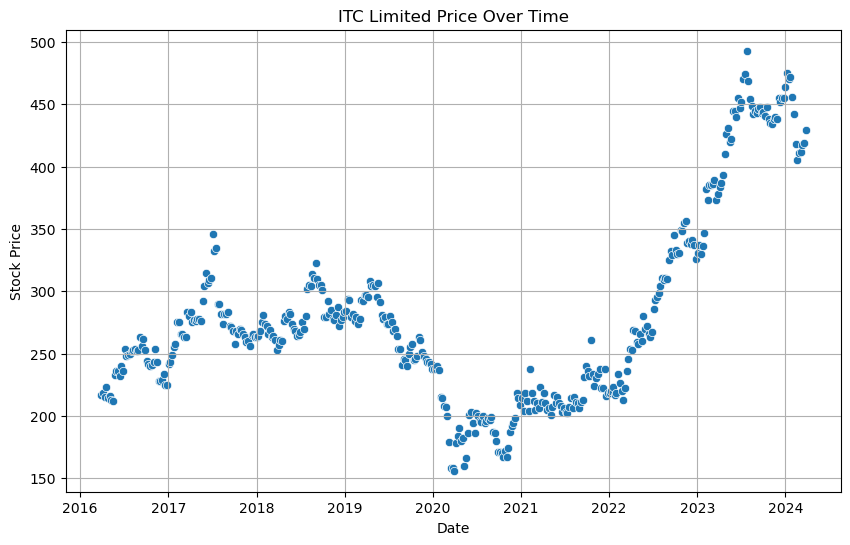

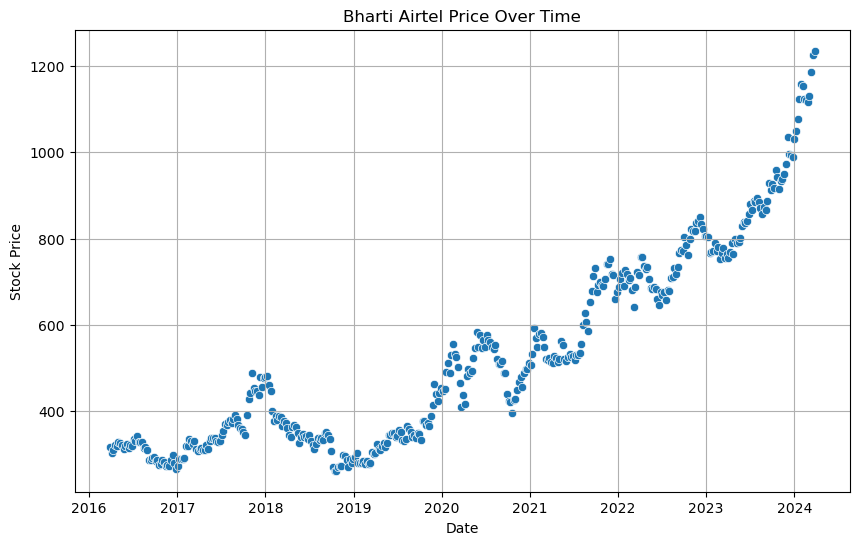

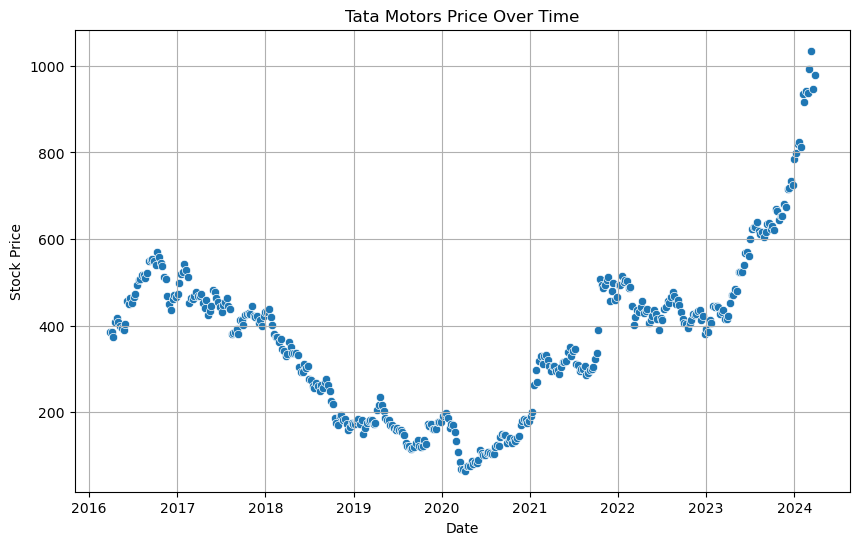

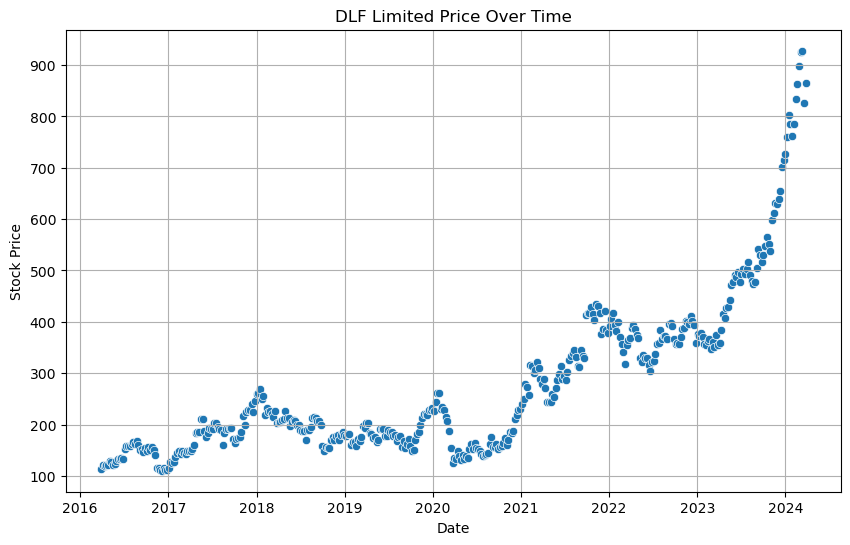

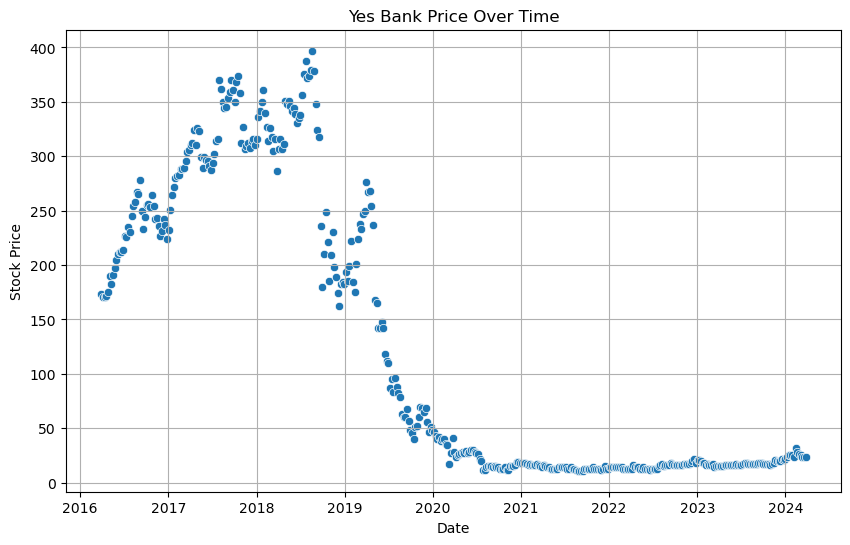

In [83]:
# Get all the numerical columns in the dataset
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot a scatterplot for all the columns against Date
for i, stock in enumerate (numeric_columns):
    plt.figure(figsize=(10, 6))
#   plt.scatter(df.index, df[stock])
    sns.scatterplot(x="Date", y=stock, data=df)
    plt.title(f'{stock} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

**Inference**
- Please refer Business Report


# Returns and Volatility Analysis


## Return Calculation

In [92]:
# Calculate Log Retuns
Return_of_Stocks =  np.log(df.drop(['Date'],axis=1)).diff(axis = 0)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Set to None to display all row

Return_of_Stocks

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291
5,0.009302,0.024769,-0.024214,0.055791,0.082238
6,-0.013986,-0.006135,-0.019803,-0.015625,-0.037538
7,-0.004706,-0.015504,-0.015114,-0.040166,0.042787
8,0.094452,-0.025318,-0.012772,0.016261,0.030930
9,0.012793,0.019048,0.040308,0.039531,0.039806


**Inference**
- PLease refer Business Report


## Average Returns

In [103]:
# Calculate Mean Returns for all stocks
StockMeans = Return_of_Stocks.mean()
StockMeans.sort_values()

Yes Bank        -0.004737
ITC Limited      0.001634
Tata Motors      0.002234
Bharti Airtel    0.003271
DLF Limited      0.004863
dtype: float64

**Inference**
- Please refer Business Report


## Volatility

In [106]:
# Calculate Standard Deviation of Returns for all stocks
StockStdDev = Return_of_Stocks.std()  ## Complete the code to get the std. deviation for the returns for all stocks
StockStdDev.sort_values()

ITC Limited      0.035904
Bharti Airtel    0.038728
DLF Limited      0.057785
Tata Motors      0.060484
Yes Bank         0.093879
dtype: float64

**Inference**
-


## Visualizing Returns and Volatility

In [122]:
# Convert above results to dataframe for mean and std. deviation for the returns of all stocks
df_final = []
df_final = pd.DataFrame({'Stock_Means_(LogReturns)':StockMeans, 'Stock_StandardDeviation_(LogReturns)':StockStdDev}) 
df_final

,Stock_Means_(LogReturns),Stock_StandardDeviation_(LogReturns)
ITC Limited,0.001634,0.035904
Bharti Airtel,0.003271,0.038728
Tata Motors,0.002234,0.060484
DLF Limited,0.004863,0.057785
Yes Bank,-0.004737,0.093879


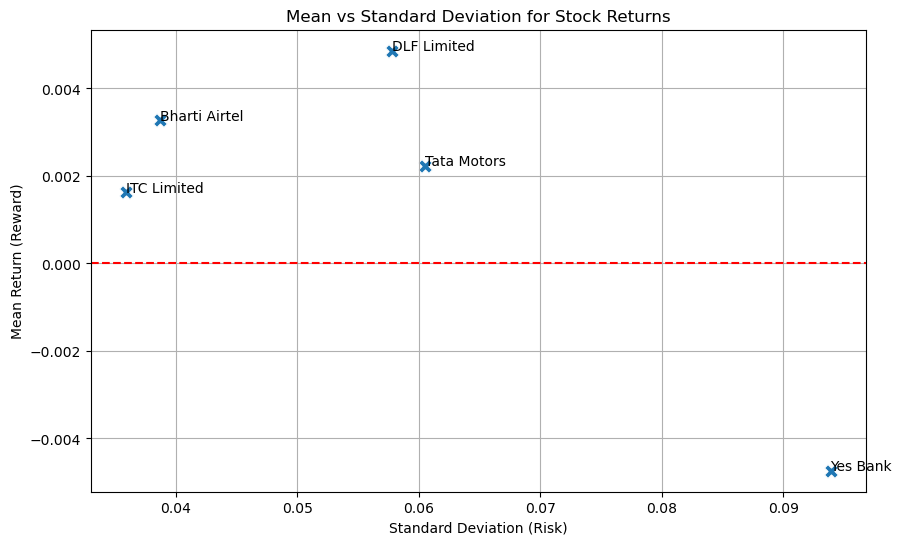

In [138]:
# Plot of Returns vs Volatility for the returns for all stocks

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.scatterplot(x="Stock_StandardDeviation_(LogReturns)", y="Stock_Means_(LogReturns)", data=df_final, marker='X', s=100)
#plt.scatter(df_final['Stock Standard Deviation (Log Returns)'], df_final['Stock Means (Log Returns)'])
plt.axhline(y=0,linestyle='--', color = "red")

for index, row in df_final.iterrows():
    ax.text(row['Stock_StandardDeviation_(LogReturns)'], row['Stock_Means_(LogReturns)'], index)

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Mean Return (Reward)')
plt.title('Mean vs Standard Deviation for Stock Returns')
plt.grid()
plt.show()

**Inference**
- Please refer Business Report


# Conclusions and Recommendations

*
Please refer Business Report
___